In [1]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.rcParams.update({'figure.figsize': (18, 8), 'figure.dpi': 100})

Using TensorFlow backend.


In [2]:
df = pd.read_csv('iig_maitri.csv')
df.obstime = pd.to_datetime(df.obstime)
df.set_index('obstime', inplace=True)
size=df.size
orig=df
size=size-df.size
df=df[df.tempr>-100]
print(df)

                     tempr     rh     ws      wd      ap
obstime                                                 
2012-01-01 00:00:00  -1.36  56.19  10.34  233.79  976.00
2012-01-01 01:00:00  -1.37  54.99  11.34  232.24  976.00
2012-01-01 02:00:00  -1.19  53.36  10.87  236.04  975.81
2012-01-01 03:00:00  -0.56  48.94  11.76  240.23  975.00
2012-01-01 04:00:00  -1.02  53.36  13.07  234.68  975.00
2012-01-01 05:00:00  -1.19  53.75  14.32  231.56  975.00
2012-01-01 06:00:00  -0.57  51.03  13.85  234.64  974.87
2012-01-01 07:00:00  -0.33  51.59  13.65  236.77  974.00
2012-01-01 08:00:00  -0.07  52.77  12.90  235.86  974.00
2012-01-01 09:00:00   0.30  50.73  12.56  235.05  974.00
2012-01-01 10:00:00   0.74  51.18  12.60  232.95  973.15
2012-01-01 11:00:00   1.24  48.97  12.97  236.37  973.00
2012-01-01 12:00:00   1.66  50.95  11.37  236.97  972.23
2012-01-01 13:00:00   2.13  52.37  10.92  235.91  971.48
2012-01-01 14:00:00   2.38  51.18  10.65  232.94  971.00
2012-01-01 15:00:00   2.31  48.

In [3]:

#df_month = df.resample('M').mean()
#temp = df_month[['temp']]
#temp.dropna(inplace=True)

In [4]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [15]:
#df=df.last(30)
raw_values2 = df['tempr'].values
raw_values=raw_values2[:int(0.8*raw_values2.size)]
testX=raw_values2[int(0.8*raw_values2.size):]
# print(raw_values)

In [ ]:
n_steps = 24
X, y = split_sequence(raw_values, n_steps)
for i in range(len(raw_values)-n_steps):
    print( X[i], y[i])
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

[-1.36 -1.37 -1.19 -0.56 -1.02 -1.19 -0.57 -0.33 -0.07  0.3   0.74  1.24
  1.66  2.13  2.38  2.31  1.96  1.72  1.17  0.69  0.29 -0.33 -0.88 -2.  ] -2.15
[-1.37 -1.19 -0.56 -1.02 -1.19 -0.57 -0.33 -0.07  0.3   0.74  1.24  1.66
  2.13  2.38  2.31  1.96  1.72  1.17  0.69  0.29 -0.33 -0.88 -2.   -2.15] -3.2
[-1.19 -0.56 -1.02 -1.19 -0.57 -0.33 -0.07  0.3   0.74  1.24  1.66  2.13
  2.38  2.31  1.96  1.72  1.17  0.69  0.29 -0.33 -0.88 -2.   -2.15 -3.2 ] -3.33
[-0.56 -1.02 -1.19 -0.57 -0.33 -0.07  0.3   0.74  1.24  1.66  2.13  2.38
  2.31  1.96  1.72  1.17  0.69  0.29 -0.33 -0.88 -2.   -2.15 -3.2  -3.33] -2.92
[-1.02 -1.19 -0.57 -0.33 -0.07  0.3   0.74  1.24  1.66  2.13  2.38  2.31
  1.96  1.72  1.17  0.69  0.29 -0.33 -0.88 -2.   -2.15 -3.2  -3.33 -2.92] -2.59
[-1.19 -0.57 -0.33 -0.07  0.3   0.74  1.24  1.66  2.13  2.38  2.31  1.96
  1.72  1.17  0.69  0.29 -0.33 -0.88 -2.   -2.15 -3.2  -3.33 -2.92 -2.59] -2.08
[-0.57 -0.33 -0.07  0.3   0.74  1.24  1.66  2.13  2.38  2.31  1.96  1.72
  1.17  0.

 -4.99 -5.   -4.97 -5.   -4.47 -4.34 -3.84 -2.55 -0.48  1.31  1.43  1.08] 0.7
[-2.23 -2.21 -2.72 -3.26 -3.89 -4.46 -4.79 -5.02 -4.64 -4.63 -5.1  -4.99
 -5.   -4.97 -5.   -4.47 -4.34 -3.84 -2.55 -0.48  1.31  1.43  1.08  0.7 ] 0.44
[-2.21 -2.72 -3.26 -3.89 -4.46 -4.79 -5.02 -4.64 -4.63 -5.1  -4.99 -5.
 -4.97 -5.   -4.47 -4.34 -3.84 -2.55 -0.48  1.31  1.43  1.08  0.7   0.44] -0.26
[-2.72 -3.26 -3.89 -4.46 -4.79 -5.02 -4.64 -4.63 -5.1  -4.99 -5.   -4.97
 -5.   -4.47 -4.34 -3.84 -2.55 -0.48  1.31  1.43  1.08  0.7   0.44 -0.26] -0.74
[-3.26 -3.89 -4.46 -4.79 -5.02 -4.64 -4.63 -5.1  -4.99 -5.   -4.97 -5.
 -4.47 -4.34 -3.84 -2.55 -0.48  1.31  1.43  1.08  0.7   0.44 -0.26 -0.74] -1.54
[-3.89 -4.46 -4.79 -5.02 -4.64 -4.63 -5.1  -4.99 -5.   -4.97 -5.   -4.47
 -4.34 -3.84 -2.55 -0.48  1.31  1.43  1.08  0.7   0.44 -0.26 -0.74 -1.54] -2.6
[-4.46 -4.79 -5.02 -4.64 -4.63 -5.1  -4.99 -5.   -4.97 -5.   -4.47 -4.34
 -3.84 -2.55 -0.48  1.31  1.43  1.08  0.7   0.44 -0.26 -0.74 -1.54 -2.6 ] -3.01
[-4.79 -5.

[-0.94  0.18  0.26  0.46  1.05  1.71  2.    2.    1.6   0.82  0.18 -0.17
 -0.47 -0.88 -1.47 -2.15 -2.51 -2.83 -2.83 -2.62 -2.69 -2.95 -3.18 -2.65] -2.34
[ 0.18  0.26  0.46  1.05  1.71  2.    2.    1.6   0.82  0.18 -0.17 -0.47
 -0.88 -1.47 -2.15 -2.51 -2.83 -2.83 -2.62 -2.69 -2.95 -3.18 -2.65 -2.34] -1.98
[ 0.26  0.46  1.05  1.71  2.    2.    1.6   0.82  0.18 -0.17 -0.47 -0.88
 -1.47 -2.15 -2.51 -2.83 -2.83 -2.62 -2.69 -2.95 -3.18 -2.65 -2.34 -1.98] -1.55
[ 0.46  1.05  1.71  2.    2.    1.6   0.82  0.18 -0.17 -0.47 -0.88 -1.47
 -2.15 -2.51 -2.83 -2.83 -2.62 -2.69 -2.95 -3.18 -2.65 -2.34 -1.98 -1.55] -0.84
[ 1.05  1.71  2.    2.    1.6   0.82  0.18 -0.17 -0.47 -0.88 -1.47 -2.15
 -2.51 -2.83 -2.83 -2.62 -2.69 -2.95 -3.18 -2.65 -2.34 -1.98 -1.55 -0.84] -0.9
[ 1.71  2.    2.    1.6   0.82  0.18 -0.17 -0.47 -0.88 -1.47 -2.15 -2.51
 -2.83 -2.83 -2.62 -2.69 -2.95 -3.18 -2.65 -2.34 -1.98 -1.55 -0.84 -0.9 ] -0.82
[ 2.    2.    1.6   0.82  0.18 -0.17 -0.47 -0.88 -1.47 -2.15 -2.51 -2.83
 -2.83 -2.

[-6.44 -5.71 -5.45 -4.58 -4.17 -4.1  -3.78 -2.91 -2.64 -2.78 -2.85 -2.62
 -2.72 -2.86 -3.31 -3.41 -3.83 -4.08 -4.4  -4.61 -4.84 -4.81 -4.79 -5.17] -5.58
[-5.71 -5.45 -4.58 -4.17 -4.1  -3.78 -2.91 -2.64 -2.78 -2.85 -2.62 -2.72
 -2.86 -3.31 -3.41 -3.83 -4.08 -4.4  -4.61 -4.84 -4.81 -4.79 -5.17 -5.58] -5.7
[-5.45 -4.58 -4.17 -4.1  -3.78 -2.91 -2.64 -2.78 -2.85 -2.62 -2.72 -2.86
 -3.31 -3.41 -3.83 -4.08 -4.4  -4.61 -4.84 -4.81 -4.79 -5.17 -5.58 -5.7 ] -5.78
[-4.58 -4.17 -4.1  -3.78 -2.91 -2.64 -2.78 -2.85 -2.62 -2.72 -2.86 -3.31
 -3.41 -3.83 -4.08 -4.4  -4.61 -4.84 -4.81 -4.79 -5.17 -5.58 -5.7  -5.78] -5.91
[-4.17 -4.1  -3.78 -2.91 -2.64 -2.78 -2.85 -2.62 -2.72 -2.86 -3.31 -3.41
 -3.83 -4.08 -4.4  -4.61 -4.84 -4.81 -4.79 -5.17 -5.58 -5.7  -5.78 -5.91] -5.87
[-4.1  -3.78 -2.91 -2.64 -2.78 -2.85 -2.62 -2.72 -2.86 -3.31 -3.41 -3.83
 -4.08 -4.4  -4.61 -4.84 -4.81 -4.79 -5.17 -5.58 -5.7  -5.78 -5.91 -5.87] -5.73
[-3.78 -2.91 -2.64 -2.78 -2.85 -2.62 -2.72 -2.86 -3.31 -3.41 -3.83 -4.08
 -4.4  -4.

  1.87  2.02  1.05  0.62  0.72  0.12 -0.5  -0.99 -1.55 -1.64 -1.72 -1.52] -1.91
[-3.27 -3.41 -3.6  -2.84 -1.92 -0.63 -0.38 -0.07  0.84  0.72  1.56  1.87
  2.02  1.05  0.62  0.72  0.12 -0.5  -0.99 -1.55 -1.64 -1.72 -1.52 -1.91] -2.47
[-3.41 -3.6  -2.84 -1.92 -0.63 -0.38 -0.07  0.84  0.72  1.56  1.87  2.02
  1.05  0.62  0.72  0.12 -0.5  -0.99 -1.55 -1.64 -1.72 -1.52 -1.91 -2.47] -3.66
[-3.6  -2.84 -1.92 -0.63 -0.38 -0.07  0.84  0.72  1.56  1.87  2.02  1.05
  0.62  0.72  0.12 -0.5  -0.99 -1.55 -1.64 -1.72 -1.52 -1.91 -2.47 -3.66] -3.68
[-2.84 -1.92 -0.63 -0.38 -0.07  0.84  0.72  1.56  1.87  2.02  1.05  0.62
  0.72  0.12 -0.5  -0.99 -1.55 -1.64 -1.72 -1.52 -1.91 -2.47 -3.66 -3.68] -3.79
[-1.92 -0.63 -0.38 -0.07  0.84  0.72  1.56  1.87  2.02  1.05  0.62  0.72
  0.12 -0.5  -0.99 -1.55 -1.64 -1.72 -1.52 -1.91 -2.47 -3.66 -3.68 -3.79] -2.8
[-0.63 -0.38 -0.07  0.84  0.72  1.56  1.87  2.02  1.05  0.62  0.72  0.12
 -0.5  -0.99 -1.55 -1.64 -1.72 -1.52 -1.91 -2.47 -3.66 -3.68 -3.79 -2.8 ] -2.05
[-0

 -4.15 -3.77 -4.   -2.75 -1.85 -1.64 -1.94 -2.13 -1.95 -2.34 -2.64 -3.01] -3.35
[-2.34 -2.61 -4.64 -5.75 -6.51 -6.81 -5.97 -6.34 -6.38 -5.88 -5.46 -4.15
 -3.77 -4.   -2.75 -1.85 -1.64 -1.94 -2.13 -1.95 -2.34 -2.64 -3.01 -3.35] -3.47
[-2.61 -4.64 -5.75 -6.51 -6.81 -5.97 -6.34 -6.38 -5.88 -5.46 -4.15 -3.77
 -4.   -2.75 -1.85 -1.64 -1.94 -2.13 -1.95 -2.34 -2.64 -3.01 -3.35 -3.47] -3.92
[-4.64 -5.75 -6.51 -6.81 -5.97 -6.34 -6.38 -5.88 -5.46 -4.15 -3.77 -4.
 -2.75 -1.85 -1.64 -1.94 -2.13 -1.95 -2.34 -2.64 -3.01 -3.35 -3.47 -3.92] -4.21
[-5.75 -6.51 -6.81 -5.97 -6.34 -6.38 -5.88 -5.46 -4.15 -3.77 -4.   -2.75
 -1.85 -1.64 -1.94 -2.13 -1.95 -2.34 -2.64 -3.01 -3.35 -3.47 -3.92 -4.21] -4.05
[-6.51 -6.81 -5.97 -6.34 -6.38 -5.88 -5.46 -4.15 -3.77 -4.   -2.75 -1.85
 -1.64 -1.94 -2.13 -1.95 -2.34 -2.64 -3.01 -3.35 -3.47 -3.92 -4.21 -4.05] -4.49
[-6.81 -5.97 -6.34 -6.38 -5.88 -5.46 -4.15 -3.77 -4.   -2.75 -1.85 -1.64
 -1.94 -2.13 -1.95 -2.34 -2.64 -3.01 -3.35 -3.47 -3.92 -4.21 -4.05 -4.49] -4.59
[-5.

 -0.88 -0.86 -0.12 -0.39 -0.2  -0.18 -0.61 -0.36  0.47 -0.13 -0.64 -1.02] -1.54
[-1.93 -1.88 -2.29 -2.85 -2.71 -2.81 -3.06 -2.96 -1.62 -1.24 -1.29 -0.88
 -0.86 -0.12 -0.39 -0.2  -0.18 -0.61 -0.36  0.47 -0.13 -0.64 -1.02 -1.54] -1.98
[-1.88 -2.29 -2.85 -2.71 -2.81 -3.06 -2.96 -1.62 -1.24 -1.29 -0.88 -0.86
 -0.12 -0.39 -0.2  -0.18 -0.61 -0.36  0.47 -0.13 -0.64 -1.02 -1.54 -1.98] -2.21
[-2.29 -2.85 -2.71 -2.81 -3.06 -2.96 -1.62 -1.24 -1.29 -0.88 -0.86 -0.12
 -0.39 -0.2  -0.18 -0.61 -0.36  0.47 -0.13 -0.64 -1.02 -1.54 -1.98 -2.21] -2.05
[-2.85 -2.71 -2.81 -3.06 -2.96 -1.62 -1.24 -1.29 -0.88 -0.86 -0.12 -0.39
 -0.2  -0.18 -0.61 -0.36  0.47 -0.13 -0.64 -1.02 -1.54 -1.98 -2.21 -2.05] -2.54
[-2.71 -2.81 -3.06 -2.96 -1.62 -1.24 -1.29 -0.88 -0.86 -0.12 -0.39 -0.2
 -0.18 -0.61 -0.36  0.47 -0.13 -0.64 -1.02 -1.54 -1.98 -2.21 -2.05 -2.54] -2.95
[-2.81 -3.06 -2.96 -1.62 -1.24 -1.29 -0.88 -0.86 -0.12 -0.39 -0.2  -0.18
 -0.61 -0.36  0.47 -0.13 -0.64 -1.02 -1.54 -1.98 -2.21 -2.05 -2.54 -2.95] -2.97
[-3

 -3.8  -3.   -2.58 -1.98 -1.32 -2.43 -3.76 -4.93 -6.4  -7.37 -8.52 -9.64] -9.94
[-7.04 -7.2  -7.54 -7.72 -7.35 -7.01 -6.61 -5.79 -5.04 -4.91 -4.61 -3.8
 -3.   -2.58 -1.98 -1.32 -2.43 -3.76 -4.93 -6.4  -7.37 -8.52 -9.64 -9.94] -10.2
[ -7.2   -7.54  -7.72  -7.35  -7.01  -6.61  -5.79  -5.04  -4.91  -4.61
  -3.8   -3.    -2.58  -1.98  -1.32  -2.43  -3.76  -4.93  -6.4   -7.37
  -8.52  -9.64  -9.94 -10.2 ] -11.0
[ -7.54  -7.72  -7.35  -7.01  -6.61  -5.79  -5.04  -4.91  -4.61  -3.8
  -3.    -2.58  -1.98  -1.32  -2.43  -3.76  -4.93  -6.4   -7.37  -8.52
  -9.64  -9.94 -10.2  -11.  ] -10.46
[ -7.72  -7.35  -7.01  -6.61  -5.79  -5.04  -4.91  -4.61  -3.8   -3.
  -2.58  -1.98  -1.32  -2.43  -3.76  -4.93  -6.4   -7.37  -8.52  -9.64
  -9.94 -10.2  -11.   -10.46] -10.55
[ -7.35  -7.01  -6.61  -5.79  -5.04  -4.91  -4.61  -3.8   -3.    -2.58
  -1.98  -1.32  -2.43  -3.76  -4.93  -6.4   -7.37  -8.52  -9.64  -9.94
 -10.2  -11.   -10.46 -10.55] -9.35
[ -7.01  -6.61  -5.79  -5.04  -4.91  -4.61  -3.8   -3.   

  -8.    -7.72  -8.76  -9.56] -10.69
[ -9.51 -10.84 -11.48 -11.91 -12.42 -12.93 -12.41 -14.15 -15.41 -15.39
 -14.58 -13.11 -13.61 -12.5  -10.78 -10.17  -8.92  -8.31  -7.84  -8.
  -7.72  -8.76  -9.56 -10.69] -11.92
[-10.84 -11.48 -11.91 -12.42 -12.93 -12.41 -14.15 -15.41 -15.39 -14.58
 -13.11 -13.61 -12.5  -10.78 -10.17  -8.92  -8.31  -7.84  -8.    -7.72
  -8.76  -9.56 -10.69 -11.92] -11.75
[-11.48 -11.91 -12.42 -12.93 -12.41 -14.15 -15.41 -15.39 -14.58 -13.11
 -13.61 -12.5  -10.78 -10.17  -8.92  -8.31  -7.84  -8.    -7.72  -8.76
  -9.56 -10.69 -11.92 -11.75] -11.26
[-11.91 -12.42 -12.93 -12.41 -14.15 -15.41 -15.39 -14.58 -13.11 -13.61
 -12.5  -10.78 -10.17  -8.92  -8.31  -7.84  -8.    -7.72  -8.76  -9.56
 -10.69 -11.92 -11.75 -11.26] -10.57
[-12.42 -12.93 -12.41 -14.15 -15.41 -15.39 -14.58 -13.11 -13.61 -12.5
 -10.78 -10.17  -8.92  -8.31  -7.84  -8.    -7.72  -8.76  -9.56 -10.69
 -11.92 -11.75 -11.26 -10.57] -11.78
[-12.93 -12.41 -14.15 -15.41 -15.39 -14.58 -13.11 -13.61 -12.5  -10.78


 -6.2  -6.31 -6.3  -6.24 -6.43 -6.29 -6.29 -6.31 -6.48 -6.44 -6.12 -6.14] -6.15
[-8.69 -8.66 -8.36 -8.28 -7.83 -7.61 -6.92 -6.54 -6.27 -6.08 -6.05 -6.2
 -6.31 -6.3  -6.24 -6.43 -6.29 -6.29 -6.31 -6.48 -6.44 -6.12 -6.14 -6.15] -6.08
[-8.66 -8.36 -8.28 -7.83 -7.61 -6.92 -6.54 -6.27 -6.08 -6.05 -6.2  -6.31
 -6.3  -6.24 -6.43 -6.29 -6.29 -6.31 -6.48 -6.44 -6.12 -6.14 -6.15 -6.08] -5.79
[-8.36 -8.28 -7.83 -7.61 -6.92 -6.54 -6.27 -6.08 -6.05 -6.2  -6.31 -6.3
 -6.24 -6.43 -6.29 -6.29 -6.31 -6.48 -6.44 -6.12 -6.14 -6.15 -6.08 -5.79] -5.31
[-8.28 -7.83 -7.61 -6.92 -6.54 -6.27 -6.08 -6.05 -6.2  -6.31 -6.3  -6.24
 -6.43 -6.29 -6.29 -6.31 -6.48 -6.44 -6.12 -6.14 -6.15 -6.08 -5.79 -5.31] -5.07
[-7.83 -7.61 -6.92 -6.54 -6.27 -6.08 -6.05 -6.2  -6.31 -6.3  -6.24 -6.43
 -6.29 -6.29 -6.31 -6.48 -6.44 -6.12 -6.14 -6.15 -6.08 -5.79 -5.31 -5.07] -4.85
[-7.61 -6.92 -6.54 -6.27 -6.08 -6.05 -6.2  -6.31 -6.3  -6.24 -6.43 -6.29
 -6.29 -6.31 -6.48 -6.44 -6.12 -6.14 -6.15 -6.08 -5.79 -5.31 -5.07 -4.85] -4.5
[-6.9

 -12.73 -10.8  -11.45 -11.26] -10.12
[-11.59 -11.97 -10.93 -10.37 -10.34 -11.62 -12.55 -13.31 -13.82 -14.5
 -14.74 -14.8  -14.94 -14.91 -14.67 -15.03 -12.77 -11.93 -11.96 -12.73
 -10.8  -11.45 -11.26 -10.12] -10.01
[-11.97 -10.93 -10.37 -10.34 -11.62 -12.55 -13.31 -13.82 -14.5  -14.74
 -14.8  -14.94 -14.91 -14.67 -15.03 -12.77 -11.93 -11.96 -12.73 -10.8
 -11.45 -11.26 -10.12 -10.01] -10.3
[-10.93 -10.37 -10.34 -11.62 -12.55 -13.31 -13.82 -14.5  -14.74 -14.8
 -14.94 -14.91 -14.67 -15.03 -12.77 -11.93 -11.96 -12.73 -10.8  -11.45
 -11.26 -10.12 -10.01 -10.3 ] -10.57
[-10.37 -10.34 -11.62 -12.55 -13.31 -13.82 -14.5  -14.74 -14.8  -14.94
 -14.91 -14.67 -15.03 -12.77 -11.93 -11.96 -12.73 -10.8  -11.45 -11.26
 -10.12 -10.01 -10.3  -10.57] -9.85
[-10.34 -11.62 -12.55 -13.31 -13.82 -14.5  -14.74 -14.8  -14.94 -14.91
 -14.67 -15.03 -12.77 -11.93 -11.96 -12.73 -10.8  -11.45 -11.26 -10.12
 -10.01 -10.3  -10.57  -9.85] -11.49
[-11.62 -12.55 -13.31 -13.82 -14.5  -14.74 -14.8  -14.94 -14.91 -14.67
 -

 -10.29  -9.87  -9.38  -8.74] -8.91
[-12.59 -11.81 -11.42 -11.18 -11.37 -11.1  -13.44 -13.58 -13.63 -13.98
 -13.05 -13.19 -13.17 -13.39 -13.46 -13.1  -12.46 -12.18 -11.22 -10.29
  -9.87  -9.38  -8.74  -8.91] -8.96
[-11.81 -11.42 -11.18 -11.37 -11.1  -13.44 -13.58 -13.63 -13.98 -13.05
 -13.19 -13.17 -13.39 -13.46 -13.1  -12.46 -12.18 -11.22 -10.29  -9.87
  -9.38  -8.74  -8.91  -8.96] -9.14
[-11.42 -11.18 -11.37 -11.1  -13.44 -13.58 -13.63 -13.98 -13.05 -13.19
 -13.17 -13.39 -13.46 -13.1  -12.46 -12.18 -11.22 -10.29  -9.87  -9.38
  -8.74  -8.91  -8.96  -9.14] -8.85
[-11.18 -11.37 -11.1  -13.44 -13.58 -13.63 -13.98 -13.05 -13.19 -13.17
 -13.39 -13.46 -13.1  -12.46 -12.18 -11.22 -10.29  -9.87  -9.38  -8.74
  -8.91  -8.96  -9.14  -8.85] -8.72
[-11.37 -11.1  -13.44 -13.58 -13.63 -13.98 -13.05 -13.19 -13.17 -13.39
 -13.46 -13.1  -12.46 -12.18 -11.22 -10.29  -9.87  -9.38  -8.74  -8.91
  -8.96  -9.14  -8.85  -8.72] -8.26
[-11.1  -13.44 -13.58 -13.63 -13.98 -13.05 -13.19 -13.17 -13.39 -13.46
 -1

 -6.51 -6.68 -6.79 -6.71 -6.92 -7.02 -7.2  -7.52 -8.14 -8.31 -8.34 -8.46] -8.3
[-4.53 -4.7  -4.54 -4.47 -4.57 -4.94 -5.17 -5.2  -5.52 -5.61 -6.11 -6.51
 -6.68 -6.79 -6.71 -6.92 -7.02 -7.2  -7.52 -8.14 -8.31 -8.34 -8.46 -8.3 ] -7.9
[-4.7  -4.54 -4.47 -4.57 -4.94 -5.17 -5.2  -5.52 -5.61 -6.11 -6.51 -6.68
 -6.79 -6.71 -6.92 -7.02 -7.2  -7.52 -8.14 -8.31 -8.34 -8.46 -8.3  -7.9 ] -8.28
[-4.54 -4.47 -4.57 -4.94 -5.17 -5.2  -5.52 -5.61 -6.11 -6.51 -6.68 -6.79
 -6.71 -6.92 -7.02 -7.2  -7.52 -8.14 -8.31 -8.34 -8.46 -8.3  -7.9  -8.28] -8.64
[-4.47 -4.57 -4.94 -5.17 -5.2  -5.52 -5.61 -6.11 -6.51 -6.68 -6.79 -6.71
 -6.92 -7.02 -7.2  -7.52 -8.14 -8.31 -8.34 -8.46 -8.3  -7.9  -8.28 -8.64] -9.14
[-4.57 -4.94 -5.17 -5.2  -5.52 -5.61 -6.11 -6.51 -6.68 -6.79 -6.71 -6.92
 -7.02 -7.2  -7.52 -8.14 -8.31 -8.34 -8.46 -8.3  -7.9  -8.28 -8.64 -9.14] -9.4
[-4.94 -5.17 -5.2  -5.52 -5.61 -6.11 -6.51 -6.68 -6.79 -6.71 -6.92 -7.02
 -7.2  -7.52 -8.14 -8.31 -8.34 -8.46 -8.3  -7.9  -8.28 -8.64 -9.14 -9.4 ] -10.17
[ -5

 -19.99 -20.95 -21.56 -21.99] -21.02
[-18.79 -17.44 -17.86 -18.44 -19.49 -19.88 -20.78 -19.46 -19.39 -20.21
 -20.78 -21.25 -21.34 -20.62 -18.63 -18.28 -18.19 -18.15 -17.75 -19.99
 -20.95 -21.56 -21.99 -21.02] -21.15
[-17.44 -17.86 -18.44 -19.49 -19.88 -20.78 -19.46 -19.39 -20.21 -20.78
 -21.25 -21.34 -20.62 -18.63 -18.28 -18.19 -18.15 -17.75 -19.99 -20.95
 -21.56 -21.99 -21.02 -21.15] -21.5
[-17.86 -18.44 -19.49 -19.88 -20.78 -19.46 -19.39 -20.21 -20.78 -21.25
 -21.34 -20.62 -18.63 -18.28 -18.19 -18.15 -17.75 -19.99 -20.95 -21.56
 -21.99 -21.02 -21.15 -21.5 ] -23.07
[-18.44 -19.49 -19.88 -20.78 -19.46 -19.39 -20.21 -20.78 -21.25 -21.34
 -20.62 -18.63 -18.28 -18.19 -18.15 -17.75 -19.99 -20.95 -21.56 -21.99
 -21.02 -21.15 -21.5  -23.07] -24.25
[-19.49 -19.88 -20.78 -19.46 -19.39 -20.21 -20.78 -21.25 -21.34 -20.62
 -18.63 -18.28 -18.19 -18.15 -17.75 -19.99 -20.95 -21.56 -21.99 -21.02
 -21.15 -21.5  -23.07 -24.25] -23.6
[-19.88 -20.78 -19.46 -19.39 -20.21 -20.78 -21.25 -21.34 -20.62 -18.63

 -14.48 -14.62 -14.89 -15.07] -15.26
[-12.95 -13.23 -13.43 -13.31 -13.52 -13.38 -13.57 -13.77 -13.97 -13.89
 -14.05 -14.12 -14.14 -14.22 -14.26 -14.02 -14.2  -14.52 -14.64 -14.48
 -14.62 -14.89 -15.07 -15.26] -15.21
[-13.23 -13.43 -13.31 -13.52 -13.38 -13.57 -13.77 -13.97 -13.89 -14.05
 -14.12 -14.14 -14.22 -14.26 -14.02 -14.2  -14.52 -14.64 -14.48 -14.62
 -14.89 -15.07 -15.26 -15.21] -15.29
[-13.43 -13.31 -13.52 -13.38 -13.57 -13.77 -13.97 -13.89 -14.05 -14.12
 -14.14 -14.22 -14.26 -14.02 -14.2  -14.52 -14.64 -14.48 -14.62 -14.89
 -15.07 -15.26 -15.21 -15.29] -15.08
[-13.31 -13.52 -13.38 -13.57 -13.77 -13.97 -13.89 -14.05 -14.12 -14.14
 -14.22 -14.26 -14.02 -14.2  -14.52 -14.64 -14.48 -14.62 -14.89 -15.07
 -15.26 -15.21 -15.29 -15.08] -14.63
[-13.52 -13.38 -13.57 -13.77 -13.97 -13.89 -14.05 -14.12 -14.14 -14.22
 -14.26 -14.02 -14.2  -14.52 -14.64 -14.48 -14.62 -14.89 -15.07 -15.26
 -15.21 -15.29 -15.08 -14.63] -14.28
[-13.38 -13.57 -13.77 -13.97 -13.89 -14.05 -14.12 -14.14 -14.22 -14.

 -19.23 -18.6  -18.83 -18.09] -17.12
[-20.07 -20.61 -21.59 -21.45 -20.6  -21.39 -21.83 -21.58 -21.06 -21.83
 -21.92 -21.84 -22.41 -22.22 -22.13 -22.05 -21.84 -21.6  -20.06 -19.23
 -18.6  -18.83 -18.09 -17.12] -16.86
[-20.61 -21.59 -21.45 -20.6  -21.39 -21.83 -21.58 -21.06 -21.83 -21.92
 -21.84 -22.41 -22.22 -22.13 -22.05 -21.84 -21.6  -20.06 -19.23 -18.6
 -18.83 -18.09 -17.12 -16.86] -15.55
[-21.59 -21.45 -20.6  -21.39 -21.83 -21.58 -21.06 -21.83 -21.92 -21.84
 -22.41 -22.22 -22.13 -22.05 -21.84 -21.6  -20.06 -19.23 -18.6  -18.83
 -18.09 -17.12 -16.86 -15.55] -14.5
[-21.45 -20.6  -21.39 -21.83 -21.58 -21.06 -21.83 -21.92 -21.84 -22.41
 -22.22 -22.13 -22.05 -21.84 -21.6  -20.06 -19.23 -18.6  -18.83 -18.09
 -17.12 -16.86 -15.55 -14.5 ] -14.63
[-20.6  -21.39 -21.83 -21.58 -21.06 -21.83 -21.92 -21.84 -22.41 -22.22
 -22.13 -22.05 -21.84 -21.6  -20.06 -19.23 -18.6  -18.83 -18.09 -17.12
 -16.86 -15.55 -14.5  -14.63] -13.62
[-21.39 -21.83 -21.58 -21.06 -21.83 -21.92 -21.84 -22.41 -22.22 -22.13

 -5.75 -6.14 -6.27 -6.03 -5.92 -6.2  -6.16 -6.02 -6.43 -6.74 -6.85 -7.38] -7.73
[-7.53 -8.08 -8.24 -7.93 -7.65 -7.38 -6.75 -6.36 -5.79 -5.43 -5.77 -5.75
 -6.14 -6.27 -6.03 -5.92 -6.2  -6.16 -6.02 -6.43 -6.74 -6.85 -7.38 -7.73] -8.03
[-8.08 -8.24 -7.93 -7.65 -7.38 -6.75 -6.36 -5.79 -5.43 -5.77 -5.75 -6.14
 -6.27 -6.03 -5.92 -6.2  -6.16 -6.02 -6.43 -6.74 -6.85 -7.38 -7.73 -8.03] -8.11
[-8.24 -7.93 -7.65 -7.38 -6.75 -6.36 -5.79 -5.43 -5.77 -5.75 -6.14 -6.27
 -6.03 -5.92 -6.2  -6.16 -6.02 -6.43 -6.74 -6.85 -7.38 -7.73 -8.03 -8.11] -8.41
[-7.93 -7.65 -7.38 -6.75 -6.36 -5.79 -5.43 -5.77 -5.75 -6.14 -6.27 -6.03
 -5.92 -6.2  -6.16 -6.02 -6.43 -6.74 -6.85 -7.38 -7.73 -8.03 -8.11 -8.41] -8.98
[-7.65 -7.38 -6.75 -6.36 -5.79 -5.43 -5.77 -5.75 -6.14 -6.27 -6.03 -5.92
 -6.2  -6.16 -6.02 -6.43 -6.74 -6.85 -7.38 -7.73 -8.03 -8.11 -8.41 -8.98] -9.03
[-7.38 -6.75 -6.36 -5.79 -5.43 -5.77 -5.75 -6.14 -6.27 -6.03 -5.92 -6.2
 -6.16 -6.02 -6.43 -6.74 -6.85 -7.38 -7.73 -8.03 -8.11 -8.41 -8.98 -9.03] -8.98
[-6

 -17.05 -17.35 -16.89 -16.75] -16.29
[-14.8  -14.69 -14.17 -14.76 -14.61 -15.09 -15.44 -15.77 -15.78 -16.85
 -17.3  -16.82 -17.03 -16.76 -16.74 -17.08 -17.36 -16.12 -16.17 -17.05
 -17.35 -16.89 -16.75 -16.29] -15.86
[-14.69 -14.17 -14.76 -14.61 -15.09 -15.44 -15.77 -15.78 -16.85 -17.3
 -16.82 -17.03 -16.76 -16.74 -17.08 -17.36 -16.12 -16.17 -17.05 -17.35
 -16.89 -16.75 -16.29 -15.86] -15.38
[-14.17 -14.76 -14.61 -15.09 -15.44 -15.77 -15.78 -16.85 -17.3  -16.82
 -17.03 -16.76 -16.74 -17.08 -17.36 -16.12 -16.17 -17.05 -17.35 -16.89
 -16.75 -16.29 -15.86 -15.38] -14.78
[-14.76 -14.61 -15.09 -15.44 -15.77 -15.78 -16.85 -17.3  -16.82 -17.03
 -16.76 -16.74 -17.08 -17.36 -16.12 -16.17 -17.05 -17.35 -16.89 -16.75
 -16.29 -15.86 -15.38 -14.78] -14.48
[-14.61 -15.09 -15.44 -15.77 -15.78 -16.85 -17.3  -16.82 -17.03 -16.76
 -16.74 -17.08 -17.36 -16.12 -16.17 -17.05 -17.35 -16.89 -16.75 -16.29
 -15.86 -15.38 -14.78 -14.48] -14.1
[-15.09 -15.44 -15.77 -15.78 -16.85 -17.3  -16.82 -17.03 -16.76 -16.74

 -21.86 -22.09 -24.36 -23.48] -24.35
[-21.7  -22.24 -22.45 -22.81 -22.53 -21.91 -22.2  -23.97 -22.65 -22.02
 -21.79 -21.58 -24.1  -23.9  -22.52 -22.39 -21.63 -22.88 -24.12 -21.86
 -22.09 -24.36 -23.48 -24.35] -24.66
[-22.24 -22.45 -22.81 -22.53 -21.91 -22.2  -23.97 -22.65 -22.02 -21.79
 -21.58 -24.1  -23.9  -22.52 -22.39 -21.63 -22.88 -24.12 -21.86 -22.09
 -24.36 -23.48 -24.35 -24.66] -24.73
[-22.45 -22.81 -22.53 -21.91 -22.2  -23.97 -22.65 -22.02 -21.79 -21.58
 -24.1  -23.9  -22.52 -22.39 -21.63 -22.88 -24.12 -21.86 -22.09 -24.36
 -23.48 -24.35 -24.66 -24.73] -25.43
[-22.81 -22.53 -21.91 -22.2  -23.97 -22.65 -22.02 -21.79 -21.58 -24.1
 -23.9  -22.52 -22.39 -21.63 -22.88 -24.12 -21.86 -22.09 -24.36 -23.48
 -24.35 -24.66 -24.73 -25.43] -24.8
[-22.53 -21.91 -22.2  -23.97 -22.65 -22.02 -21.79 -21.58 -24.1  -23.9
 -22.52 -22.39 -21.63 -22.88 -24.12 -21.86 -22.09 -24.36 -23.48 -24.35
 -24.66 -24.73 -25.43 -24.8 ] -24.75
[-21.91 -22.2  -23.97 -22.65 -22.02 -21.79 -21.58 -24.1  -23.9  -22.52


 -8.48 -8.31 -8.22 -8.37 -8.19 -7.63 -7.52 -7.42 -7.83 -8.27 -8.73 -8.61] -8.27
[-9.53 -9.53 -9.35 -9.18 -9.23 -9.11 -9.01 -8.73 -8.51 -8.59 -8.56 -8.48
 -8.31 -8.22 -8.37 -8.19 -7.63 -7.52 -7.42 -7.83 -8.27 -8.73 -8.61 -8.27] -8.31
[-9.53 -9.35 -9.18 -9.23 -9.11 -9.01 -8.73 -8.51 -8.59 -8.56 -8.48 -8.31
 -8.22 -8.37 -8.19 -7.63 -7.52 -7.42 -7.83 -8.27 -8.73 -8.61 -8.27 -8.31] -8.3
[-9.35 -9.18 -9.23 -9.11 -9.01 -8.73 -8.51 -8.59 -8.56 -8.48 -8.31 -8.22
 -8.37 -8.19 -7.63 -7.52 -7.42 -7.83 -8.27 -8.73 -8.61 -8.27 -8.31 -8.3 ] -8.28
[-9.18 -9.23 -9.11 -9.01 -8.73 -8.51 -8.59 -8.56 -8.48 -8.31 -8.22 -8.37
 -8.19 -7.63 -7.52 -7.42 -7.83 -8.27 -8.73 -8.61 -8.27 -8.31 -8.3  -8.28] -8.23
[-9.23 -9.11 -9.01 -8.73 -8.51 -8.59 -8.56 -8.48 -8.31 -8.22 -8.37 -8.19
 -7.63 -7.52 -7.42 -7.83 -8.27 -8.73 -8.61 -8.27 -8.31 -8.3  -8.28 -8.23] -8.38
[-9.11 -9.01 -8.73 -8.51 -8.59 -8.56 -8.48 -8.31 -8.22 -8.37 -8.19 -7.63
 -7.52 -7.42 -7.83 -8.27 -8.73 -8.61 -8.27 -8.31 -8.3  -8.28 -8.23 -8.38] -8.35
[-9

 -19.35 -18.65 -19.53 -20.56] -20.81
[-20.5  -19.3  -19.09 -18.52 -18.87 -18.54 -17.96 -15.89 -17.42 -20.38
 -20.48 -20.29 -17.59 -17.64 -18.51 -18.63 -17.34 -17.25 -20.29 -19.35
 -18.65 -19.53 -20.56 -20.81] -19.49
[-19.3  -19.09 -18.52 -18.87 -18.54 -17.96 -15.89 -17.42 -20.38 -20.48
 -20.29 -17.59 -17.64 -18.51 -18.63 -17.34 -17.25 -20.29 -19.35 -18.65
 -19.53 -20.56 -20.81 -19.49] -20.42
[-19.09 -18.52 -18.87 -18.54 -17.96 -15.89 -17.42 -20.38 -20.48 -20.29
 -17.59 -17.64 -18.51 -18.63 -17.34 -17.25 -20.29 -19.35 -18.65 -19.53
 -20.56 -20.81 -19.49 -20.42] -20.14
[-18.52 -18.87 -18.54 -17.96 -15.89 -17.42 -20.38 -20.48 -20.29 -17.59
 -17.64 -18.51 -18.63 -17.34 -17.25 -20.29 -19.35 -18.65 -19.53 -20.56
 -20.81 -19.49 -20.42 -20.14] -19.81
[-18.87 -18.54 -17.96 -15.89 -17.42 -20.38 -20.48 -20.29 -17.59 -17.64
 -18.51 -18.63 -17.34 -17.25 -20.29 -19.35 -18.65 -19.53 -20.56 -20.81
 -19.49 -20.42 -20.14 -19.81] -18.6
[-18.54 -17.96 -15.89 -17.42 -20.38 -20.48 -20.29 -17.59 -17.64 -18.5

 -24.78 -25.12 -24.48 -23.9 ] -23.65
[-24.08 -25.67 -26.09 -27.03 -28.07 -27.62 -26.93 -26.81 -26.29 -26.01
 -23.06 -23.92 -23.07 -22.09 -21.7  -22.23 -23.54 -22.85 -23.44 -24.78
 -25.12 -24.48 -23.9  -23.65] -23.91
[-25.67 -26.09 -27.03 -28.07 -27.62 -26.93 -26.81 -26.29 -26.01 -23.06
 -23.92 -23.07 -22.09 -21.7  -22.23 -23.54 -22.85 -23.44 -24.78 -25.12
 -24.48 -23.9  -23.65 -23.91] -23.75
[-26.09 -27.03 -28.07 -27.62 -26.93 -26.81 -26.29 -26.01 -23.06 -23.92
 -23.07 -22.09 -21.7  -22.23 -23.54 -22.85 -23.44 -24.78 -25.12 -24.48
 -23.9  -23.65 -23.91 -23.75] -23.87
[-27.03 -28.07 -27.62 -26.93 -26.81 -26.29 -26.01 -23.06 -23.92 -23.07
 -22.09 -21.7  -22.23 -23.54 -22.85 -23.44 -24.78 -25.12 -24.48 -23.9
 -23.65 -23.91 -23.75 -23.87] -23.56
[-28.07 -27.62 -26.93 -26.81 -26.29 -26.01 -23.06 -23.92 -23.07 -22.09
 -21.7  -22.23 -23.54 -22.85 -23.44 -24.78 -25.12 -24.48 -23.9  -23.65
 -23.91 -23.75 -23.87 -23.56] -23.65
[-27.62 -26.93 -26.81 -26.29 -26.01 -23.06 -23.92 -23.07 -22.09 -21.7

[-14.67 -14.87 -15.16 -14.69 -13.99 -13.16 -12.42 -12.69 -12.54 -12.13
 -12.26 -11.94 -12.44 -12.44 -12.54 -12.15 -11.99 -12.41 -12.35 -12.48
 -12.74 -12.84 -12.84 -12.9 ] -12.87
[-14.87 -15.16 -14.69 -13.99 -13.16 -12.42 -12.69 -12.54 -12.13 -12.26
 -11.94 -12.44 -12.44 -12.54 -12.15 -11.99 -12.41 -12.35 -12.48 -12.74
 -12.84 -12.84 -12.9  -12.87] -12.35
[-15.16 -14.69 -13.99 -13.16 -12.42 -12.69 -12.54 -12.13 -12.26 -11.94
 -12.44 -12.44 -12.54 -12.15 -11.99 -12.41 -12.35 -12.48 -12.74 -12.84
 -12.84 -12.9  -12.87 -12.35] -12.08
[-14.69 -13.99 -13.16 -12.42 -12.69 -12.54 -12.13 -12.26 -11.94 -12.44
 -12.44 -12.54 -12.15 -11.99 -12.41 -12.35 -12.48 -12.74 -12.84 -12.84
 -12.9  -12.87 -12.35 -12.08] -11.92
[-13.99 -13.16 -12.42 -12.69 -12.54 -12.13 -12.26 -11.94 -12.44 -12.44
 -12.54 -12.15 -11.99 -12.41 -12.35 -12.48 -12.74 -12.84 -12.84 -12.9
 -12.87 -12.35 -12.08 -11.92] -11.86
[-13.16 -12.42 -12.69 -12.54 -12.13 -12.26 -11.94 -12.44 -12.44 -12.54
 -12.15 -11.99 -12.41 -12.35 -12.48

 -17.37 -17.37 -17.74 -17.18] -16.89
[-14.74 -15.07 -15.39 -15.39 -15.1  -14.52 -13.84 -13.74 -14.23 -14.27
 -14.97 -15.46 -16.17 -16.85 -16.31 -15.3  -15.52 -15.57 -16.7  -17.37
 -17.37 -17.74 -17.18 -16.89] -17.02
[-15.07 -15.39 -15.39 -15.1  -14.52 -13.84 -13.74 -14.23 -14.27 -14.97
 -15.46 -16.17 -16.85 -16.31 -15.3  -15.52 -15.57 -16.7  -17.37 -17.37
 -17.74 -17.18 -16.89 -17.02] -16.83
[-15.39 -15.39 -15.1  -14.52 -13.84 -13.74 -14.23 -14.27 -14.97 -15.46
 -16.17 -16.85 -16.31 -15.3  -15.52 -15.57 -16.7  -17.37 -17.37 -17.74
 -17.18 -16.89 -17.02 -16.83] -18.1
[-15.39 -15.1  -14.52 -13.84 -13.74 -14.23 -14.27 -14.97 -15.46 -16.17
 -16.85 -16.31 -15.3  -15.52 -15.57 -16.7  -17.37 -17.37 -17.74 -17.18
 -16.89 -17.02 -16.83 -18.1 ] -19.78
[-15.1  -14.52 -13.84 -13.74 -14.23 -14.27 -14.97 -15.46 -16.17 -16.85
 -16.31 -15.3  -15.52 -15.57 -16.7  -17.37 -17.37 -17.74 -17.18 -16.89
 -17.02 -16.83 -18.1  -19.78] -19.98
[-14.52 -13.84 -13.74 -14.23 -14.27 -14.97 -15.46 -16.17 -16.85 -16.3

 -23.69 -23.6  -23.81 -23.34] -22.7
[-21.59 -20.75 -19.94 -21.07 -20.85 -20.8  -20.36 -21.27 -22.17 -23.12
 -22.46 -22.41 -21.4  -20.14 -21.69 -21.39 -21.38 -21.33 -22.88 -23.69
 -23.6  -23.81 -23.34 -22.7 ] -23.72
[-20.75 -19.94 -21.07 -20.85 -20.8  -20.36 -21.27 -22.17 -23.12 -22.46
 -22.41 -21.4  -20.14 -21.69 -21.39 -21.38 -21.33 -22.88 -23.69 -23.6
 -23.81 -23.34 -22.7  -23.72] -23.17
[-19.94 -21.07 -20.85 -20.8  -20.36 -21.27 -22.17 -23.12 -22.46 -22.41
 -21.4  -20.14 -21.69 -21.39 -21.38 -21.33 -22.88 -23.69 -23.6  -23.81
 -23.34 -22.7  -23.72 -23.17] -22.1
[-21.07 -20.85 -20.8  -20.36 -21.27 -22.17 -23.12 -22.46 -22.41 -21.4
 -20.14 -21.69 -21.39 -21.38 -21.33 -22.88 -23.69 -23.6  -23.81 -23.34
 -22.7  -23.72 -23.17 -22.1 ] -20.85
[-20.85 -20.8  -20.36 -21.27 -22.17 -23.12 -22.46 -22.41 -21.4  -20.14
 -21.69 -21.39 -21.38 -21.33 -22.88 -23.69 -23.6  -23.81 -23.34 -22.7
 -23.72 -23.17 -22.1  -20.85] -19.35
[-20.8  -20.36 -21.27 -22.17 -23.12 -22.46 -22.41 -21.4  -20.14 -21.69
 -

 -7.4  -7.07 -6.81 -6.75 -7.   -7.1  -7.13 -7.22 -7.16 -7.24 -7.34 -7.32] -7.26
[-8.88 -8.67 -8.05 -7.95 -7.47 -7.08 -7.06 -6.93 -6.94 -6.71 -7.23 -7.4
 -7.07 -6.81 -6.75 -7.   -7.1  -7.13 -7.22 -7.16 -7.24 -7.34 -7.32 -7.26] -7.34
[-8.67 -8.05 -7.95 -7.47 -7.08 -7.06 -6.93 -6.94 -6.71 -7.23 -7.4  -7.07
 -6.81 -6.75 -7.   -7.1  -7.13 -7.22 -7.16 -7.24 -7.34 -7.32 -7.26 -7.34] -7.42
[-8.05 -7.95 -7.47 -7.08 -7.06 -6.93 -6.94 -6.71 -7.23 -7.4  -7.07 -6.81
 -6.75 -7.   -7.1  -7.13 -7.22 -7.16 -7.24 -7.34 -7.32 -7.26 -7.34 -7.42] -7.42
[-7.95 -7.47 -7.08 -7.06 -6.93 -6.94 -6.71 -7.23 -7.4  -7.07 -6.81 -6.75
 -7.   -7.1  -7.13 -7.22 -7.16 -7.24 -7.34 -7.32 -7.26 -7.34 -7.42 -7.42] -7.48
[-7.47 -7.08 -7.06 -6.93 -6.94 -6.71 -7.23 -7.4  -7.07 -6.81 -6.75 -7.
 -7.1  -7.13 -7.22 -7.16 -7.24 -7.34 -7.32 -7.26 -7.34 -7.42 -7.42 -7.48] -7.42
[-7.08 -7.06 -6.93 -6.94 -6.71 -7.23 -7.4  -7.07 -6.81 -6.75 -7.   -7.1
 -7.13 -7.22 -7.16 -7.24 -7.34 -7.32 -7.26 -7.34 -7.42 -7.42 -7.48 -7.42] -7.51
[-7.06

 -17.23 -17.9  -18.38 -19.3 ] -19.13
[-25.22 -23.24 -24.81 -25.12 -24.61 -23.8  -25.58 -25.62 -26.26 -25.81
 -23.18 -20.96 -18.51 -18.39 -18.08 -18.03 -18.07 -17.74 -17.6  -17.23
 -17.9  -18.38 -19.3  -19.13] -18.65
[-23.24 -24.81 -25.12 -24.61 -23.8  -25.58 -25.62 -26.26 -25.81 -23.18
 -20.96 -18.51 -18.39 -18.08 -18.03 -18.07 -17.74 -17.6  -17.23 -17.9
 -18.38 -19.3  -19.13 -18.65] -19.09
[-24.81 -25.12 -24.61 -23.8  -25.58 -25.62 -26.26 -25.81 -23.18 -20.96
 -18.51 -18.39 -18.08 -18.03 -18.07 -17.74 -17.6  -17.23 -17.9  -18.38
 -19.3  -19.13 -18.65 -19.09] -19.46
[-25.12 -24.61 -23.8  -25.58 -25.62 -26.26 -25.81 -23.18 -20.96 -18.51
 -18.39 -18.08 -18.03 -18.07 -17.74 -17.6  -17.23 -17.9  -18.38 -19.3
 -19.13 -18.65 -19.09 -19.46] -19.0
[-24.61 -23.8  -25.58 -25.62 -26.26 -25.81 -23.18 -20.96 -18.51 -18.39
 -18.08 -18.03 -18.07 -17.74 -17.6  -17.23 -17.9  -18.38 -19.3  -19.13
 -18.65 -19.09 -19.46 -19.  ] -18.76
[-23.8  -25.58 -25.62 -26.26 -25.81 -23.18 -20.96 -18.51 -18.39 -18.08


 -17.85 -18.09 -17.82 -17.83] -17.87
[-22.19 -20.96 -20.73 -21.96 -22.36 -20.61 -19.74 -19.5  -18.82 -18.76
 -18.77 -19.17 -19.08 -19.37 -18.65 -18.76 -18.43 -17.58 -17.61 -17.85
 -18.09 -17.82 -17.83 -17.87] -18.01
[-20.96 -20.73 -21.96 -22.36 -20.61 -19.74 -19.5  -18.82 -18.76 -18.77
 -19.17 -19.08 -19.37 -18.65 -18.76 -18.43 -17.58 -17.61 -17.85 -18.09
 -17.82 -17.83 -17.87 -18.01] -17.96
[-20.73 -21.96 -22.36 -20.61 -19.74 -19.5  -18.82 -18.76 -18.77 -19.17
 -19.08 -19.37 -18.65 -18.76 -18.43 -17.58 -17.61 -17.85 -18.09 -17.82
 -17.83 -17.87 -18.01 -17.96] -18.27
[-21.96 -22.36 -20.61 -19.74 -19.5  -18.82 -18.76 -18.77 -19.17 -19.08
 -19.37 -18.65 -18.76 -18.43 -17.58 -17.61 -17.85 -18.09 -17.82 -17.83
 -17.87 -18.01 -17.96 -18.27] -17.91
[-22.36 -20.61 -19.74 -19.5  -18.82 -18.76 -18.77 -19.17 -19.08 -19.37
 -18.65 -18.76 -18.43 -17.58 -17.61 -17.85 -18.09 -17.82 -17.83 -17.87
 -18.01 -17.96 -18.27 -17.91] -18.11
[-20.61 -19.74 -19.5  -18.82 -18.76 -18.77 -19.17 -19.08 -19.37 -18.

 -24.1  -24.47 -25.21 -25.65] -24.96
[-23.66 -24.15 -23.85 -23.35 -23.18 -24.1  -22.96 -23.33 -23.16 -23.62
 -23.39 -23.07 -23.03 -23.34 -24.03 -24.54 -25.22 -25.11 -24.26 -24.1
 -24.47 -25.21 -25.65 -24.96] -23.2
[-24.15 -23.85 -23.35 -23.18 -24.1  -22.96 -23.33 -23.16 -23.62 -23.39
 -23.07 -23.03 -23.34 -24.03 -24.54 -25.22 -25.11 -24.26 -24.1  -24.47
 -25.21 -25.65 -24.96 -23.2 ] -23.68
[-23.85 -23.35 -23.18 -24.1  -22.96 -23.33 -23.16 -23.62 -23.39 -23.07
 -23.03 -23.34 -24.03 -24.54 -25.22 -25.11 -24.26 -24.1  -24.47 -25.21
 -25.65 -24.96 -23.2  -23.68] -25.44
[-23.35 -23.18 -24.1  -22.96 -23.33 -23.16 -23.62 -23.39 -23.07 -23.03
 -23.34 -24.03 -24.54 -25.22 -25.11 -24.26 -24.1  -24.47 -25.21 -25.65
 -24.96 -23.2  -23.68 -25.44] -26.29
[-23.18 -24.1  -22.96 -23.33 -23.16 -23.62 -23.39 -23.07 -23.03 -23.34
 -24.03 -24.54 -25.22 -25.11 -24.26 -24.1  -24.47 -25.21 -25.65 -24.96
 -23.2  -23.68 -25.44 -26.29] -25.61
[-24.1  -22.96 -23.33 -23.16 -23.62 -23.39 -23.07 -23.03 -23.34 -24.03

 -26.32 -28.72 -26.37 -25.73] -25.31
[-22.38 -22.89 -23.05 -22.9  -22.38 -21.7  -24.11 -24.93 -25.12 -25.78
 -25.01 -24.78 -25.24 -25.48 -26.03 -25.89 -25.8  -26.42 -26.27 -26.32
 -28.72 -26.37 -25.73 -25.31] -28.37
[-22.89 -23.05 -22.9  -22.38 -21.7  -24.11 -24.93 -25.12 -25.78 -25.01
 -24.78 -25.24 -25.48 -26.03 -25.89 -25.8  -26.42 -26.27 -26.32 -28.72
 -26.37 -25.73 -25.31 -28.37] -28.75
[-23.05 -22.9  -22.38 -21.7  -24.11 -24.93 -25.12 -25.78 -25.01 -24.78
 -25.24 -25.48 -26.03 -25.89 -25.8  -26.42 -26.27 -26.32 -28.72 -26.37
 -25.73 -25.31 -28.37 -28.75] -27.42
[-22.9  -22.38 -21.7  -24.11 -24.93 -25.12 -25.78 -25.01 -24.78 -25.24
 -25.48 -26.03 -25.89 -25.8  -26.42 -26.27 -26.32 -28.72 -26.37 -25.73
 -25.31 -28.37 -28.75 -27.42] -28.98
[-22.38 -21.7  -24.11 -24.93 -25.12 -25.78 -25.01 -24.78 -25.24 -25.48
 -26.03 -25.89 -25.8  -26.42 -26.27 -26.32 -28.72 -26.37 -25.73 -25.31
 -28.37 -28.75 -27.42 -28.98] -28.23
[-21.7  -24.11 -24.93 -25.12 -25.78 -25.01 -24.78 -25.24 -25.48 -26.

 -18.61 -19.35 -19.46 -19.86] -20.93
[-14.23 -15.18 -17.43 -16.   -15.49 -16.21 -16.44 -17.97 -18.55 -17.85
 -16.52 -15.07 -15.81 -16.35 -16.97 -18.68 -18.41 -17.9  -17.86 -18.61
 -19.35 -19.46 -19.86 -20.93] -20.56
[-15.18 -17.43 -16.   -15.49 -16.21 -16.44 -17.97 -18.55 -17.85 -16.52
 -15.07 -15.81 -16.35 -16.97 -18.68 -18.41 -17.9  -17.86 -18.61 -19.35
 -19.46 -19.86 -20.93 -20.56] -21.73
[-17.43 -16.   -15.49 -16.21 -16.44 -17.97 -18.55 -17.85 -16.52 -15.07
 -15.81 -16.35 -16.97 -18.68 -18.41 -17.9  -17.86 -18.61 -19.35 -19.46
 -19.86 -20.93 -20.56 -21.73] -23.42
[-16.   -15.49 -16.21 -16.44 -17.97 -18.55 -17.85 -16.52 -15.07 -15.81
 -16.35 -16.97 -18.68 -18.41 -17.9  -17.86 -18.61 -19.35 -19.46 -19.86
 -20.93 -20.56 -21.73 -23.42] -22.61
[-15.49 -16.21 -16.44 -17.97 -18.55 -17.85 -16.52 -15.07 -15.81 -16.35
 -16.97 -18.68 -18.41 -17.9  -17.86 -18.61 -19.35 -19.46 -19.86 -20.93
 -20.56 -21.73 -23.42 -22.61] -22.25
[-16.21 -16.44 -17.97 -18.55 -17.85 -16.52 -15.07 -15.81 -16.35 -16.

 -16.79 -16.52 -16.9  -17.51] -17.7
[-14.67 -15.09 -15.27 -15.59 -15.76 -16.27 -16.43 -16.43 -16.7  -16.95
 -17.17 -17.39 -17.44 -17.62 -17.59 -17.23 -16.93 -17.02 -17.   -16.79
 -16.52 -16.9  -17.51 -17.7 ] -18.35
[-15.09 -15.27 -15.59 -15.76 -16.27 -16.43 -16.43 -16.7  -16.95 -17.17
 -17.39 -17.44 -17.62 -17.59 -17.23 -16.93 -17.02 -17.   -16.79 -16.52
 -16.9  -17.51 -17.7  -18.35] -18.21
[-15.27 -15.59 -15.76 -16.27 -16.43 -16.43 -16.7  -16.95 -17.17 -17.39
 -17.44 -17.62 -17.59 -17.23 -16.93 -17.02 -17.   -16.79 -16.52 -16.9
 -17.51 -17.7  -18.35 -18.21] -17.57
[-15.59 -15.76 -16.27 -16.43 -16.43 -16.7  -16.95 -17.17 -17.39 -17.44
 -17.62 -17.59 -17.23 -16.93 -17.02 -17.   -16.79 -16.52 -16.9  -17.51
 -17.7  -18.35 -18.21 -17.57] -18.38
[-15.76 -16.27 -16.43 -16.43 -16.7  -16.95 -17.17 -17.39 -17.44 -17.62
 -17.59 -17.23 -16.93 -17.02 -17.   -16.79 -16.52 -16.9  -17.51 -17.7
 -18.35 -18.21 -17.57 -18.38] -20.14
[-16.27 -16.43 -16.43 -16.7  -16.95 -17.17 -17.39 -17.44 -17.62 -17.59


[-22.9  -23.31 -22.53 -22.56 -23.13 -22.86 -22.67 -22.28 -21.99 -21.65
 -22.08 -21.78 -21.65 -22.43 -22.74 -23.12 -22.88 -22.37 -22.62 -22.55
 -22.18 -21.99 -21.96 -21.96] -21.82
[-23.31 -22.53 -22.56 -23.13 -22.86 -22.67 -22.28 -21.99 -21.65 -22.08
 -21.78 -21.65 -22.43 -22.74 -23.12 -22.88 -22.37 -22.62 -22.55 -22.18
 -21.99 -21.96 -21.96 -21.82] -21.93
[-22.53 -22.56 -23.13 -22.86 -22.67 -22.28 -21.99 -21.65 -22.08 -21.78
 -21.65 -22.43 -22.74 -23.12 -22.88 -22.37 -22.62 -22.55 -22.18 -21.99
 -21.96 -21.96 -21.82 -21.93] -21.85
[-22.56 -23.13 -22.86 -22.67 -22.28 -21.99 -21.65 -22.08 -21.78 -21.65
 -22.43 -22.74 -23.12 -22.88 -22.37 -22.62 -22.55 -22.18 -21.99 -21.96
 -21.96 -21.82 -21.93 -21.85] -21.63
[-23.13 -22.86 -22.67 -22.28 -21.99 -21.65 -22.08 -21.78 -21.65 -22.43
 -22.74 -23.12 -22.88 -22.37 -22.62 -22.55 -22.18 -21.99 -21.96 -21.96
 -21.82 -21.93 -21.85 -21.63] -21.6
[-22.86 -22.67 -22.28 -21.99 -21.65 -22.08 -21.78 -21.65 -22.43 -22.74
 -23.12 -22.88 -22.37 -22.62 -22.55

 -19.15 -19.01 -18.34 -17.69] -18.07
[-11.99 -12.08 -12.47 -12.11 -12.4  -12.19 -11.92 -11.98 -12.3  -13.
 -14.27 -14.73 -15.57 -15.4  -15.99 -17.43 -17.06 -18.7  -19.21 -19.15
 -19.01 -18.34 -17.69 -18.07] -20.65
[-12.08 -12.47 -12.11 -12.4  -12.19 -11.92 -11.98 -12.3  -13.   -14.27
 -14.73 -15.57 -15.4  -15.99 -17.43 -17.06 -18.7  -19.21 -19.15 -19.01
 -18.34 -17.69 -18.07 -20.65] -19.96
[-12.47 -12.11 -12.4  -12.19 -11.92 -11.98 -12.3  -13.   -14.27 -14.73
 -15.57 -15.4  -15.99 -17.43 -17.06 -18.7  -19.21 -19.15 -19.01 -18.34
 -17.69 -18.07 -20.65 -19.96] -18.42
[-12.11 -12.4  -12.19 -11.92 -11.98 -12.3  -13.   -14.27 -14.73 -15.57
 -15.4  -15.99 -17.43 -17.06 -18.7  -19.21 -19.15 -19.01 -18.34 -17.69
 -18.07 -20.65 -19.96 -18.42] -19.49
[-12.4  -12.19 -11.92 -11.98 -12.3  -13.   -14.27 -14.73 -15.57 -15.4
 -15.99 -17.43 -17.06 -18.7  -19.21 -19.15 -19.01 -18.34 -17.69 -18.07
 -20.65 -19.96 -18.42 -19.49] -19.44
[-12.19 -11.92 -11.98 -12.3  -13.   -14.27 -14.73 -15.57 -15.4  -15.99


 -20.74 -20.59 -21.64 -22.23] -22.62
[-14.3  -13.08 -13.26 -13.15 -13.73 -13.82 -14.03 -13.96 -14.61 -15.45
 -17.22 -17.48 -15.58 -16.87 -18.02 -17.6  -20.13 -22.04 -21.92 -20.74
 -20.59 -21.64 -22.23 -22.62] -22.91
[-13.08 -13.26 -13.15 -13.73 -13.82 -14.03 -13.96 -14.61 -15.45 -17.22
 -17.48 -15.58 -16.87 -18.02 -17.6  -20.13 -22.04 -21.92 -20.74 -20.59
 -21.64 -22.23 -22.62 -22.91] -22.35
[-13.26 -13.15 -13.73 -13.82 -14.03 -13.96 -14.61 -15.45 -17.22 -17.48
 -15.58 -16.87 -18.02 -17.6  -20.13 -22.04 -21.92 -20.74 -20.59 -21.64
 -22.23 -22.62 -22.91 -22.35] -21.47
[-13.15 -13.73 -13.82 -14.03 -13.96 -14.61 -15.45 -17.22 -17.48 -15.58
 -16.87 -18.02 -17.6  -20.13 -22.04 -21.92 -20.74 -20.59 -21.64 -22.23
 -22.62 -22.91 -22.35 -21.47] -21.1
[-13.73 -13.82 -14.03 -13.96 -14.61 -15.45 -17.22 -17.48 -15.58 -16.87
 -18.02 -17.6  -20.13 -22.04 -21.92 -20.74 -20.59 -21.64 -22.23 -22.62
 -22.91 -22.35 -21.47 -21.1 ] -20.09
[-13.82 -14.03 -13.96 -14.61 -15.45 -17.22 -17.48 -15.58 -16.87 -18.0

 -13.86 -14.65 -14.75 -14.84] -15.25
[-10.11 -11.55 -11.71 -11.99 -12.36 -12.56 -13.17 -13.63 -14.23 -14.13
 -14.   -14.06 -13.5  -13.16 -13.14 -12.62 -12.83 -12.95 -13.42 -13.86
 -14.65 -14.75 -14.84 -15.25] -14.84
[-11.55 -11.71 -11.99 -12.36 -12.56 -13.17 -13.63 -14.23 -14.13 -14.
 -14.06 -13.5  -13.16 -13.14 -12.62 -12.83 -12.95 -13.42 -13.86 -14.65
 -14.75 -14.84 -15.25 -14.84] -14.13
[-11.71 -11.99 -12.36 -12.56 -13.17 -13.63 -14.23 -14.13 -14.   -14.06
 -13.5  -13.16 -13.14 -12.62 -12.83 -12.95 -13.42 -13.86 -14.65 -14.75
 -14.84 -15.25 -14.84 -14.13] -13.68
[-11.99 -12.36 -12.56 -13.17 -13.63 -14.23 -14.13 -14.   -14.06 -13.5
 -13.16 -13.14 -12.62 -12.83 -12.95 -13.42 -13.86 -14.65 -14.75 -14.84
 -15.25 -14.84 -14.13 -13.68] -13.45
[-12.36 -12.56 -13.17 -13.63 -14.23 -14.13 -14.   -14.06 -13.5  -13.16
 -13.14 -12.62 -12.83 -12.95 -13.42 -13.86 -14.65 -14.75 -14.84 -15.25
 -14.84 -14.13 -13.68 -13.45] -14.12
[-12.56 -13.17 -13.63 -14.23 -14.13 -14.   -14.06 -13.5  -13.16 -13.14


 -26.21 -25.74 -26.11 -25.1 ] -21.86
[-25.26 -25.29 -25.39 -24.66 -24.88 -24.24 -24.52 -21.44 -20.46 -20.86
 -22.48 -26.08 -25.84 -26.64 -25.94 -24.15 -27.1  -25.61 -27.15 -26.21
 -25.74 -26.11 -25.1  -21.86] -21.1
[-25.29 -25.39 -24.66 -24.88 -24.24 -24.52 -21.44 -20.46 -20.86 -22.48
 -26.08 -25.84 -26.64 -25.94 -24.15 -27.1  -25.61 -27.15 -26.21 -25.74
 -26.11 -25.1  -21.86 -21.1 ] -20.52
[-25.39 -24.66 -24.88 -24.24 -24.52 -21.44 -20.46 -20.86 -22.48 -26.08
 -25.84 -26.64 -25.94 -24.15 -27.1  -25.61 -27.15 -26.21 -25.74 -26.11
 -25.1  -21.86 -21.1  -20.52] -19.23
[-24.66 -24.88 -24.24 -24.52 -21.44 -20.46 -20.86 -22.48 -26.08 -25.84
 -26.64 -25.94 -24.15 -27.1  -25.61 -27.15 -26.21 -25.74 -26.11 -25.1
 -21.86 -21.1  -20.52 -19.23] -18.6
[-24.88 -24.24 -24.52 -21.44 -20.46 -20.86 -22.48 -26.08 -25.84 -26.64
 -25.94 -24.15 -27.1  -25.61 -27.15 -26.21 -25.74 -26.11 -25.1  -21.86
 -21.1  -20.52 -19.23 -18.6 ] -18.83
[-24.24 -24.52 -21.44 -20.46 -20.86 -22.48 -26.08 -25.84 -26.64 -25.94


 -10.92 -10.85 -10.8  -10.74] -10.57
[-16.02 -15.63 -15.41 -15.48 -15.02 -14.49 -13.82 -13.22 -13.39 -12.67
 -12.15 -11.63 -11.7  -11.72 -11.53 -11.88 -11.13 -11.38 -11.18 -10.92
 -10.85 -10.8  -10.74 -10.57] -10.38
[-15.63 -15.41 -15.48 -15.02 -14.49 -13.82 -13.22 -13.39 -12.67 -12.15
 -11.63 -11.7  -11.72 -11.53 -11.88 -11.13 -11.38 -11.18 -10.92 -10.85
 -10.8  -10.74 -10.57 -10.38] -10.39
[-15.41 -15.48 -15.02 -14.49 -13.82 -13.22 -13.39 -12.67 -12.15 -11.63
 -11.7  -11.72 -11.53 -11.88 -11.13 -11.38 -11.18 -10.92 -10.85 -10.8
 -10.74 -10.57 -10.38 -10.39] -10.31
[-15.48 -15.02 -14.49 -13.82 -13.22 -13.39 -12.67 -12.15 -11.63 -11.7
 -11.72 -11.53 -11.88 -11.13 -11.38 -11.18 -10.92 -10.85 -10.8  -10.74
 -10.57 -10.38 -10.39 -10.31] -10.36
[-15.02 -14.49 -13.82 -13.22 -13.39 -12.67 -12.15 -11.63 -11.7  -11.72
 -11.53 -11.88 -11.13 -11.38 -11.18 -10.92 -10.85 -10.8  -10.74 -10.57
 -10.38 -10.39 -10.31 -10.36] -10.7
[-14.49 -13.82 -13.22 -13.39 -12.67 -12.15 -11.63 -11.7  -11.72 -11.53


 -18.58 -19.64 -19.2  -19.19] -19.29
[-13.48 -14.04 -14.62 -15.21 -15.18 -15.2  -15.46 -15.29 -14.79 -14.64
 -13.38 -11.42 -11.19 -12.6  -13.57 -14.58 -14.87 -16.85 -17.01 -18.58
 -19.64 -19.2  -19.19 -19.29] -19.58
[-14.04 -14.62 -15.21 -15.18 -15.2  -15.46 -15.29 -14.79 -14.64 -13.38
 -11.42 -11.19 -12.6  -13.57 -14.58 -14.87 -16.85 -17.01 -18.58 -19.64
 -19.2  -19.19 -19.29 -19.58] -19.07
[-14.62 -15.21 -15.18 -15.2  -15.46 -15.29 -14.79 -14.64 -13.38 -11.42
 -11.19 -12.6  -13.57 -14.58 -14.87 -16.85 -17.01 -18.58 -19.64 -19.2
 -19.19 -19.29 -19.58 -19.07] -19.1
[-15.21 -15.18 -15.2  -15.46 -15.29 -14.79 -14.64 -13.38 -11.42 -11.19
 -12.6  -13.57 -14.58 -14.87 -16.85 -17.01 -18.58 -19.64 -19.2  -19.19
 -19.29 -19.58 -19.07 -19.1 ] -19.19
[-15.18 -15.2  -15.46 -15.29 -14.79 -14.64 -13.38 -11.42 -11.19 -12.6
 -13.57 -14.58 -14.87 -16.85 -17.01 -18.58 -19.64 -19.2  -19.19 -19.29
 -19.58 -19.07 -19.1  -19.19] -18.68
[-15.2  -15.46 -15.29 -14.79 -14.64 -13.38 -11.42 -11.19 -12.6  -13.57


 -13.52 -12.95 -13.01 -12.95] -11.75
[-15.84 -17.03 -16.42 -15.61 -13.58 -12.01 -10.74  -9.21  -7.89  -8.86
  -9.79 -11.3  -12.73 -13.56 -13.81 -13.81 -14.49 -15.67 -13.71 -13.52
 -12.95 -13.01 -12.95 -11.75] -11.38
[-17.03 -16.42 -15.61 -13.58 -12.01 -10.74  -9.21  -7.89  -8.86  -9.79
 -11.3  -12.73 -13.56 -13.81 -13.81 -14.49 -15.67 -13.71 -13.52 -12.95
 -13.01 -12.95 -11.75 -11.38] -11.02
[-16.42 -15.61 -13.58 -12.01 -10.74  -9.21  -7.89  -8.86  -9.79 -11.3
 -12.73 -13.56 -13.81 -13.81 -14.49 -15.67 -13.71 -13.52 -12.95 -13.01
 -12.95 -11.75 -11.38 -11.02] -10.72
[-15.61 -13.58 -12.01 -10.74  -9.21  -7.89  -8.86  -9.79 -11.3  -12.73
 -13.56 -13.81 -13.81 -14.49 -15.67 -13.71 -13.52 -12.95 -13.01 -12.95
 -11.75 -11.38 -11.02 -10.72] -10.24
[-13.58 -12.01 -10.74  -9.21  -7.89  -8.86  -9.79 -11.3  -12.73 -13.56
 -13.81 -13.81 -14.49 -15.67 -13.71 -13.52 -12.95 -13.01 -12.95 -11.75
 -11.38 -11.02 -10.72 -10.24] -9.03
[-12.01 -10.74  -9.21  -7.89  -8.86  -9.79 -11.3  -12.73 -13.56 -13.81

[-18.27 -11.78  -9.75  -9.65  -9.95 -10.3  -10.38 -10.37 -10.24  -9.86
  -9.61  -9.42  -8.99  -8.95  -8.74  -7.97  -7.72  -6.91  -6.72  -6.96
  -7.17  -7.94  -8.58  -9.12] -9.96
[-11.78  -9.75  -9.65  -9.95 -10.3  -10.38 -10.37 -10.24  -9.86  -9.61
  -9.42  -8.99  -8.95  -8.74  -7.97  -7.72  -6.91  -6.72  -6.96  -7.17
  -7.94  -8.58  -9.12  -9.96] -11.18
[ -9.75  -9.65  -9.95 -10.3  -10.38 -10.37 -10.24  -9.86  -9.61  -9.42
  -8.99  -8.95  -8.74  -7.97  -7.72  -6.91  -6.72  -6.96  -7.17  -7.94
  -8.58  -9.12  -9.96 -11.18] -10.36
[ -9.65  -9.95 -10.3  -10.38 -10.37 -10.24  -9.86  -9.61  -9.42  -8.99
  -8.95  -8.74  -7.97  -7.72  -6.91  -6.72  -6.96  -7.17  -7.94  -8.58
  -9.12  -9.96 -11.18 -10.36] -9.64
[ -9.95 -10.3  -10.38 -10.37 -10.24  -9.86  -9.61  -9.42  -8.99  -8.95
  -8.74  -7.97  -7.72  -6.91  -6.72  -6.96  -7.17  -7.94  -8.58  -9.12
  -9.96 -11.18 -10.36  -9.64] -10.42
[-10.3  -10.38 -10.37 -10.24  -9.86  -9.61  -9.42  -8.99  -8.95  -8.74
  -7.97  -7.72  -6.91  -6.72  -6.96 

[-18.17 -18.54 -19.1  -19.47 -20.81 -21.7  -21.96 -21.73 -21.94 -22.73
 -20.33 -18.57 -16.69 -14.66 -14.28 -12.47 -14.34 -13.32 -14.42 -16.1
 -16.56 -17.75 -18.35 -18.82] -19.49
[-18.54 -19.1  -19.47 -20.81 -21.7  -21.96 -21.73 -21.94 -22.73 -20.33
 -18.57 -16.69 -14.66 -14.28 -12.47 -14.34 -13.32 -14.42 -16.1  -16.56
 -17.75 -18.35 -18.82 -19.49] -20.02
[-19.1  -19.47 -20.81 -21.7  -21.96 -21.73 -21.94 -22.73 -20.33 -18.57
 -16.69 -14.66 -14.28 -12.47 -14.34 -13.32 -14.42 -16.1  -16.56 -17.75
 -18.35 -18.82 -19.49 -20.02] -20.34
[-19.47 -20.81 -21.7  -21.96 -21.73 -21.94 -22.73 -20.33 -18.57 -16.69
 -14.66 -14.28 -12.47 -14.34 -13.32 -14.42 -16.1  -16.56 -17.75 -18.35
 -18.82 -19.49 -20.02 -20.34] -20.62
[-20.81 -21.7  -21.96 -21.73 -21.94 -22.73 -20.33 -18.57 -16.69 -14.66
 -14.28 -12.47 -14.34 -13.32 -14.42 -16.1  -16.56 -17.75 -18.35 -18.82
 -19.49 -20.02 -20.34 -20.62] -20.15
[-21.7  -21.96 -21.73 -21.94 -22.73 -20.33 -18.57 -16.69 -14.66 -14.28
 -12.47 -14.34 -13.32 -14.42 -16.1 

 -9.19 -9.18 -9.07 -9.1  -9.33 -9.51 -9.72 -9.84 -9.96 -9.77 -8.94 -8.  ] -7.83
[-8.5  -8.55 -8.51 -8.07 -8.08 -8.15 -8.49 -9.26 -9.2  -8.98 -8.97 -9.19
 -9.18 -9.07 -9.1  -9.33 -9.51 -9.72 -9.84 -9.96 -9.77 -8.94 -8.   -7.83] -7.94
[-8.55 -8.51 -8.07 -8.08 -8.15 -8.49 -9.26 -9.2  -8.98 -8.97 -9.19 -9.18
 -9.07 -9.1  -9.33 -9.51 -9.72 -9.84 -9.96 -9.77 -8.94 -8.   -7.83 -7.94] -8.21
[-8.51 -8.07 -8.08 -8.15 -8.49 -9.26 -9.2  -8.98 -8.97 -9.19 -9.18 -9.07
 -9.1  -9.33 -9.51 -9.72 -9.84 -9.96 -9.77 -8.94 -8.   -7.83 -7.94 -8.21] -8.43
[-8.07 -8.08 -8.15 -8.49 -9.26 -9.2  -8.98 -8.97 -9.19 -9.18 -9.07 -9.1
 -9.33 -9.51 -9.72 -9.84 -9.96 -9.77 -8.94 -8.   -7.83 -7.94 -8.21 -8.43] -8.66
[-8.08 -8.15 -8.49 -9.26 -9.2  -8.98 -8.97 -9.19 -9.18 -9.07 -9.1  -9.33
 -9.51 -9.72 -9.84 -9.96 -9.77 -8.94 -8.   -7.83 -7.94 -8.21 -8.43 -8.66] -8.58
[-8.15 -8.49 -9.26 -9.2  -8.98 -8.97 -9.19 -9.18 -9.07 -9.1  -9.33 -9.51
 -9.72 -9.84 -9.96 -9.77 -8.94 -8.   -7.83 -7.94 -8.21 -8.43 -8.66 -8.58] -9.61
[-8

 -8.36 -8.3  -8.28 -8.29 -8.32 -8.27 -8.18 -7.96 -8.04 -8.11 -8.45 -8.77] -8.96
[-9.63 -9.37 -9.2  -8.86 -8.75 -8.72 -8.47 -8.7  -8.88 -8.68 -8.42 -8.36
 -8.3  -8.28 -8.29 -8.32 -8.27 -8.18 -7.96 -8.04 -8.11 -8.45 -8.77 -8.96] -8.89
[-9.37 -9.2  -8.86 -8.75 -8.72 -8.47 -8.7  -8.88 -8.68 -8.42 -8.36 -8.3
 -8.28 -8.29 -8.32 -8.27 -8.18 -7.96 -8.04 -8.11 -8.45 -8.77 -8.96 -8.89] -9.1
[-9.2  -8.86 -8.75 -8.72 -8.47 -8.7  -8.88 -8.68 -8.42 -8.36 -8.3  -8.28
 -8.29 -8.32 -8.27 -8.18 -7.96 -8.04 -8.11 -8.45 -8.77 -8.96 -8.89 -9.1 ] -9.09
[-8.86 -8.75 -8.72 -8.47 -8.7  -8.88 -8.68 -8.42 -8.36 -8.3  -8.28 -8.29
 -8.32 -8.27 -8.18 -7.96 -8.04 -8.11 -8.45 -8.77 -8.96 -8.89 -9.1  -9.09] -8.93
[-8.75 -8.72 -8.47 -8.7  -8.88 -8.68 -8.42 -8.36 -8.3  -8.28 -8.29 -8.32
 -8.27 -8.18 -7.96 -8.04 -8.11 -8.45 -8.77 -8.96 -8.89 -9.1  -9.09 -8.93] -8.72
[-8.72 -8.47 -8.7  -8.88 -8.68 -8.42 -8.36 -8.3  -8.28 -8.29 -8.32 -8.27
 -8.18 -7.96 -8.04 -8.11 -8.45 -8.77 -8.96 -8.89 -9.1  -9.09 -8.93 -8.72] -8.57
[-8.

 -12.41 -12.81 -13.33 -13.56] -13.59
[ -9.87 -10.   -10.31 -10.16 -10.24 -10.38 -10.17 -10.47 -10.32 -10.14
  -9.98 -10.03  -9.95  -9.86  -9.89 -10.42 -11.17 -11.69 -12.25 -12.41
 -12.81 -13.33 -13.56 -13.59] -13.59
[-10.   -10.31 -10.16 -10.24 -10.38 -10.17 -10.47 -10.32 -10.14  -9.98
 -10.03  -9.95  -9.86  -9.89 -10.42 -11.17 -11.69 -12.25 -12.41 -12.81
 -13.33 -13.56 -13.59 -13.59] -13.96
[-10.31 -10.16 -10.24 -10.38 -10.17 -10.47 -10.32 -10.14  -9.98 -10.03
  -9.95  -9.86  -9.89 -10.42 -11.17 -11.69 -12.25 -12.41 -12.81 -13.33
 -13.56 -13.59 -13.59 -13.96] -13.68
[-10.16 -10.24 -10.38 -10.17 -10.47 -10.32 -10.14  -9.98 -10.03  -9.95
  -9.86  -9.89 -10.42 -11.17 -11.69 -12.25 -12.41 -12.81 -13.33 -13.56
 -13.59 -13.59 -13.96 -13.68] -12.59
[-10.24 -10.38 -10.17 -10.47 -10.32 -10.14  -9.98 -10.03  -9.95  -9.86
  -9.89 -10.42 -11.17 -11.69 -12.25 -12.41 -12.81 -13.33 -13.56 -13.59
 -13.59 -13.96 -13.68 -12.59] -12.04
[-10.38 -10.17 -10.47 -10.32 -10.14  -9.98 -10.03  -9.95  -9.86  -9.

In [25]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [26]:
model.fit(X, y, epochs=1, verbose=1)

Epoch 1/1
25044/25044 [==============================] - 3s 101us/step - loss: 2.7244


In [27]:
temp_values = raw_values
pred=[]
pred=np.array(pred)
j=0
s=0
for i in range(testX.size):
    x_input = temp_values[-365*n_steps:]
    x_input = x_input.reshape((365, n_steps, n_features))
    yhat = model.predict(x_input, verbose=1)
#    s=s+(orig[j+df.size]['tempr']-yhat[0])*(orig[j+df.size-1]['tempr']-yhat[0])
    pred=np.append(pred,yhat[0])
    temp_values = np.append(temp_values, yhat[0])
    #print(x_input, yhat)
    

365/365 [==============================] - 0s 41us/step


365/365 [==============================] - 0s 46us/step


365/365 [==============================] - 0s 33us/step


365/365 [==============================] - 0s 38us/step


365/365 [==============================] - 0s 52us/step


365/365 [==============================] - 0s 38us/step


365/365 [==============================] - 0s 33us/step


365/365 [==============================] - 0s 38us/step


365/365 [==============================] - 0s 38us/step


365/365 [==============================] - 0s 38us/step


365/365 [==============================] - 0s 33us/step


365/365 [==============================] - 0s 33us/step


365/365 [==============================] - 0s 33us/step


365/365 [==============================] - 0s 33us/step


365/365 [==============================] - 0s 48us/step


365/365 [==============================] - 0s 36us/step


365/365 [==============================] - 0s 33us/step


365/365 [==============================] - 0s 38us/step


365/365 [==============================] - 0s 60us/step


365/365 [==============================] - 0s 38us/step


365/365 [==============================] - 0s 33us/step


365/365 [==============================] - 0s 33us/step


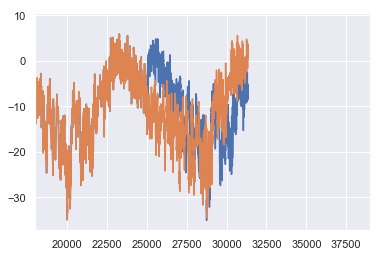

In [28]:
plt.xlim(18000,39000)
plt.plot(temp_values)
plt.plot(df.tempr.values)
plt.show()

In [29]:
print(pred.shape)

(6267,)


In [30]:
print(testX.shape)

(6267,)


In [31]:
RMSE=math.sqrt(mean_squared_error(pred,testX))

In [32]:
print(RMSE)

9.321507962596716
